Mandy House Sale Usecase


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [2]:
label = LabelEncoder()
enc = OneHotEncoder()
scaler = StandardScaler()

In [3]:
dataset = pd.read_csv("C:/Users/hyppi/OneDrive/Bootcamp/assessments Python/Module4 - Regression/kc_house_data.csv")
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
# Check for missing data - none found
nan_count = dataset.isna().sum()

print(nan_count)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
len(dataset['zipcode'].unique())

70

In [7]:
#After some thought the following are my remaining features, with price being the label that we are comparing features against.

In [8]:
dataset = dataset.drop(["id", "date", "lat", "long", "sqft_living", "sqft_living15","sqft_lot15"], axis = 1)
dataset

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,0,98103
21609,400000.0,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,0,98146
21610,402101.0,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,0,98144
21611,400000.0,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,0,98027


Next I will encode categorical data - zipcode

For the year built/renovated we want to go with whichever is newest to compare as new renovations can affect value. We also do not need duplicate data however between the two columns, therefore I will is fill from yr_built into any in yr_renovated if zero, and then rename the field to reflect a more accurate name for this of yr_build_reno. 


In [9]:
#dataset['yr_renovated'].replace(0).ffill()

#dataset['yr_renovated'] = dataset['yr_renovated'].replace(to_replace=0, method='ffill')

dataset.loc[dataset["yr_renovated"] == 0, "yr_renovated"] = dataset.loc[dataset["yr_renovated"] == 0, "yr_built"]

dataset.head()


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,1955,98178
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,1933,98028
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,1965,98136
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,1987,98074


In [10]:
dataset = dataset.drop(["yr_built"], axis = 1)
dataset

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,98178
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1991,98125
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,98028
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,98136
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,98103
21609,400000.0,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,98146
21610,402101.0,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,98144
21611,400000.0,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,98027


In [11]:
dataset.rename(columns={'yr_renovated': 'yr_build_reno'}, inplace=True)

In [12]:
dataset

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_build_reno,zipcode
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,98178
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1991,98125
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,98028
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,98136
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,98103
21609,400000.0,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,98146
21610,402101.0,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,98144
21611,400000.0,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,98027


In [13]:
dataset.loc[:, 'zipcode'] = label.fit_transform(dataset['zipcode'])

dataset

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_build_reno,zipcode
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,66
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1991,55
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,16
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,58
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,42
21609,400000.0,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,60
21610,402101.0,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,59
21611,400000.0,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,15


In [14]:
# and then train/test/split
encoded_y = dataset.iloc[:, 0].values
encoded_x = dataset.iloc[:, 1:13].values

# train is now 80% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size=0.2)

print(len(X_train), len(X_test))
# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5) 
print(len(X_train), len(X_val), len(X_test))

17290 4323
17290 2161 2162


In [15]:
#Now to scale

# Then scale
dataset[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']] = scaler.fit_transform(dataset[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']])
dataset.head(5)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_build_reno,zipcode
0,221900.0,-0.398737,-1.447464,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,1955,66
1,538000.0,-0.398737,0.175607,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,1991,55
2,180000.0,-1.473959,-1.447464,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,1933,16
3,604000.0,0.676485,1.149449,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,1965,58
4,510000.0,-0.398737,-0.149007,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,1987,37


In [16]:
#find the best KNN neighbour for regression
train_score = {}
test_score = {}
scores = []
nums = np.arange(1,40)
best_knn = []
best_score_i = -1000

for i in nums:
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_i = knn.score(X_test, y_test)
    scores.append(score_i)
    train_score[i]=knn.score(X_train, y_train)
    test_score[i]=knn.score(X_test, y_test)
    
    if score_i > best_score_i:
        best_score_i = score_i
        best_knn = i

print(test_score)
print(scores)
print(best_score_i)
print(best_knn)

{1: 0.2346001073050642, 2: 0.3680875452653577, 3: 0.41927266376087835, 4: 0.4472821202161703, 5: 0.48871125248859193, 6: 0.5080089965742666, 7: 0.5185894828592308, 8: 0.519956860454218, 9: 0.5257657564261582, 10: 0.5302903681515978, 11: 0.5395258610234367, 12: 0.5345913567259732, 13: 0.5358685055824141, 14: 0.536898829277751, 15: 0.5364920135637798, 16: 0.536606363022947, 17: 0.5395975004443121, 18: 0.5359756844374617, 19: 0.5322776721435309, 20: 0.534130354986875, 21: 0.5355623302293768, 22: 0.5327361141112842, 23: 0.5308093254420098, 24: 0.5311613955699186, 25: 0.5298916900014776, 26: 0.5281343696039147, 27: 0.5291757776724688, 28: 0.5248707589858963, 29: 0.5241669834079756, 30: 0.522158492630848, 31: 0.5224183193160833, 32: 0.5209781081502152, 33: 0.5198684566965839, 34: 0.5180736355743583, 35: 0.514086884111923, 36: 0.514260000231612, 37: 0.5120941523928911, 38: 0.5098123373121735, 39: 0.5113401073222181}
[0.2346001073050642, 0.3680875452653577, 0.41927266376087835, 0.4472821202161

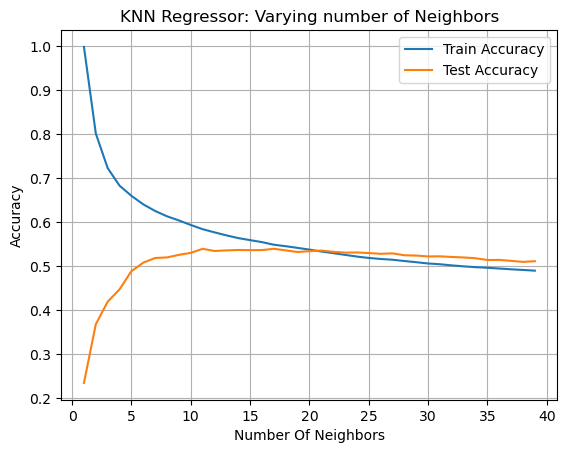

In [17]:
#Visualize train and test

# And then it looks like it's comparing?
plt.plot(nums, train_score.values(), label="Train Accuracy")
plt.plot(nums, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Regressor: Varying number of Neighbors")
plt.legend()
plt.grid()
plt.show()

In [18]:
print(scores)

knn_val = max(scores)
best_knn = scores.index(knn_val) + 1
print(knn_val,best_knn)

[0.2346001073050642, 0.3680875452653577, 0.41927266376087835, 0.4472821202161703, 0.48871125248859193, 0.5080089965742666, 0.5185894828592308, 0.519956860454218, 0.5257657564261582, 0.5302903681515978, 0.5395258610234367, 0.5345913567259732, 0.5358685055824141, 0.536898829277751, 0.5364920135637798, 0.536606363022947, 0.5395975004443121, 0.5359756844374617, 0.5322776721435309, 0.534130354986875, 0.5355623302293768, 0.5327361141112842, 0.5308093254420098, 0.5311613955699186, 0.5298916900014776, 0.5281343696039147, 0.5291757776724688, 0.5248707589858963, 0.5241669834079756, 0.522158492630848, 0.5224183193160833, 0.5209781081502152, 0.5198684566965839, 0.5180736355743583, 0.514086884111923, 0.514260000231612, 0.5120941523928911, 0.5098123373121735, 0.5113401073222181]
0.5395975004443121 17


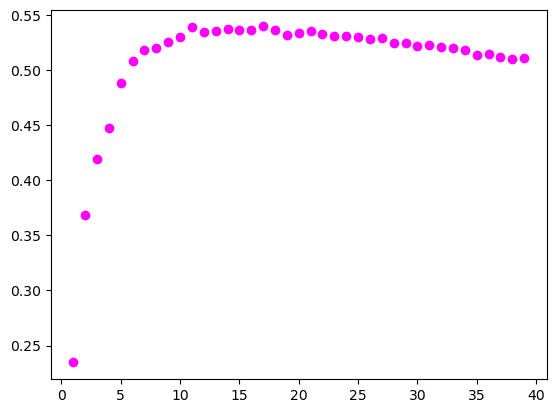

In [19]:
plt.scatter(nums, scores, color = 'magenta')

In [20]:
#Let's run the best model, It appears to be 7 typically
knn_best = KNeighborsRegressor(n_neighbors = 7)
knn_best.fit(X_train, y_train)
knn_best.score(X_test, y_test)

0.5185894828592308

In [21]:
y_pred = knn_best.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

58589060285.51405
158422.54605523983


In [22]:
#to later score the scores against each other i'll create a list and append each model score into it
models = []

In [23]:
#now to run it on the validation set

score_knn = knn_best.score(X_val, y_val)
print(score_knn)
models.append(score_knn)


0.5150552354479465


In [24]:
y_predval = knn_best.predict(X_val)
print(mean_squared_error(y_val, y_predval))
print(mean_absolute_error(y_val, y_predval))

67877339280.51777
163738.2933826932


In [25]:
# Not a great score let's try some other methods


In [26]:
#We will try with squared_error 1st, then “friedman_mse”, “absolute_error" to see what performs best
modelTree_SE = DecisionTreeRegressor(criterion="squared_error").fit(X_train, y_train)
y_pred_SE = modelTree_SE.predict(X_test) 
print(y_pred_SE)

scoreDT_SE = modelTree_SE.score(X_test, y_test)
print("score with criterion squared error = ", scoreDT_SE)

models.append(scoreDT_SE)

y_pred_SE = modelTree_SE.predict(X_test)
print("Mean Squared Error with criterion squared error  = ", mean_squared_error(y_test, y_pred_SE))

[525000. 315500. 515000. ... 240000. 359950. 888000.]
score with criterion squared error =  0.6658267688751265
Mean Squared Error with criterion squared error  =  40669854286.659


In [27]:
modelTree_AE = DecisionTreeRegressor(criterion="absolute_error", max_depth=10).fit(X_train, y_train)
y_pred_AE = modelTree_AE.predict(X_test) 

scoreDT_AE = modelTree_AE.score(X_test, y_test)
print("score with criterion absolute_error = ", scoreDT_AE)
models.append(scoreDT_AE)

y_pred_AE = modelTree_AE.predict(X_test)
print("Mean Squared Error with criterion absolute_error  = ", mean_squared_error(y_test, y_pred_AE))

score with criterion absolute_error =  0.6747319084182275
Mean Squared Error with criterion absolute_error  =  39586072900.5762


In [28]:
modelTree_FMSE = DecisionTreeRegressor(criterion="friedman_mse").fit(X_train, y_train)
y_pred_FMSE = modelTree_FMSE.predict(X_test) 
print(y_pred_FMSE)
scoreDT_FMSE = modelTree_FMSE.score(X_test, y_test)
print("score with criterion friedman_mse = ", scoreDT_FMSE)
models.append(scoreDT_FMSE)

y_pred_FMSE = modelTree_FMSE.predict(X_test)
print("Mean Squared Error with criterion friedman_mse  = ", mean_squared_error(y_test, y_pred_FMSE))

[535000. 315500. 535000. ... 257200. 359950. 888000.]
score with criterion friedman_mse =  0.641680408094095
Mean Squared Error with criterion friedman_mse  =  43608536631.776825


In [29]:
#SVR 

modelSVRlinear = SVR(kernel='linear', max_iter=1000).fit(X_train, y_train)
y_pred = modelSVRlinear.predict(X_test)

scoreLR = modelSVRlinear.score(X_test, y_test)
models.append(scoreLR)
print(scoreLR)

-1.1828107064444064


c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [30]:
y_pred = modelSVRlinear.predict(X_test)
mean_squared_error(y_test, y_pred)

265654412436.40485

In [31]:
print(models)

[0.5150552354479465, 0.6658267688751265, 0.6747319084182275, 0.641680408094095, -1.1828107064444064]


c:\Users\hyppi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

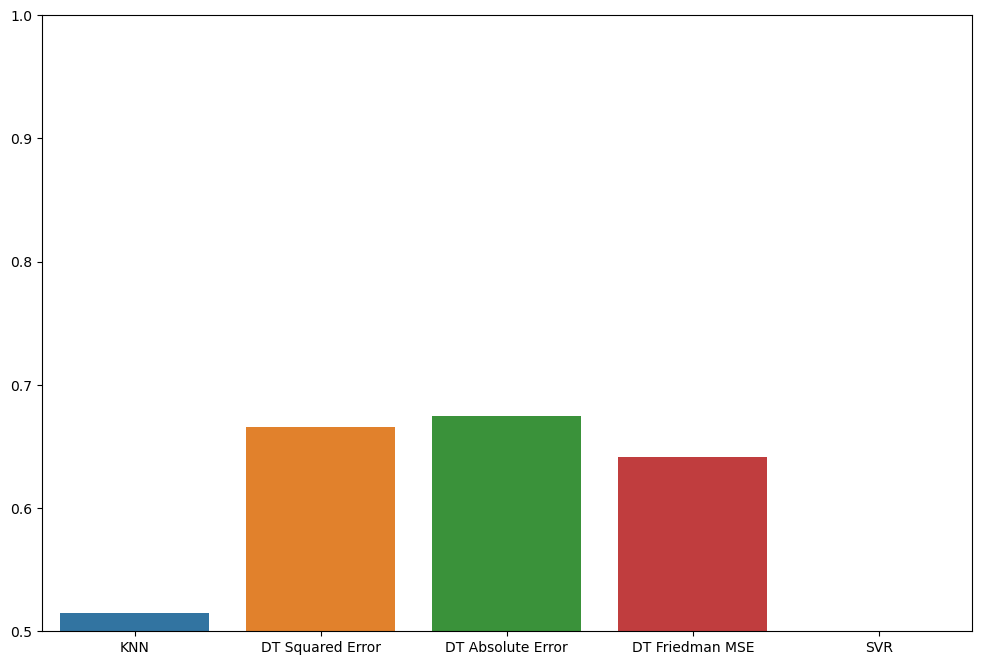

In [32]:
plt.figure(figsize=(12,8))
plt.ylim(.5, 1)
sns.barplot(x=["KNN", "DT Squared Error", "DT Absolute Error", "DT Friedman MSE", "SVR", ], y= models)

In conclusion we can see that DT with Absolute error was our best performer, and SVR should not be used.  If I were to continue to refine the models I would be adjusting hyperparameters for the DT Absolute Error to improve my final  model with.